# 1 Business Understanding

### 1.1 Problem Overview

Customer churn is the act of customers discontinuing their relationship with a company.It represents a major challenge for telecommunications businesses. Acquiring new customers is significantly more expensive than retaining existing ones, and high churn rates directly impact revenue, profitability, and brand perception.

In the increasingly competitive telecom industry, companies must proactively identify customers at risk of churning and take steps to retain them. Traditional retention efforts, such as blanket discount offers or mass outreach, are often inefficient and costly. A data-driven, predictive approach offers a more effective solution.

### 1.2 Business Objective

This project aims to develop a machine learning classification model to **predict whether a customer is likely to churn**, based on their historical and behavioral data. By identifying at-risk customers before they churn, the business can:

- Reduce customer acquisition costs by improving retention
- Optimize marketing and customer service interventions
- Personalize offers to customers who show warning signs
- Understand key drivers of churn for long-term strategic planning

### 1.3 Stakeholders

The primary stakeholders for this project include:

- **Customer Retention Team:** Needs early warnings to take preventive actions (e.g., loyalty offers).
- **Marketing Team:** Can use model insights to target at-risk segments with personalized campaigns.
- **Product Managers:** Gain insights on which service features drive churn to improve user experience.
- **Senior Leadership:** Interested in revenue retention and strategic decision-making based on customer behavior.

### 1.4 Success Criteria

The model will be considered successful if it can:

- Accurately classify customers as likely to churn or not (using precision, recall, and F1-score).
- Provide interpretable results that highlight the most influential features.
- Enable actionable recommendations to reduce churn.

Ultimately, this project supports data-driven decision-making and cost-effective customer engagement in a highly competitive market.


# 2. Data Understanding

### Dataset Overview

The dataset used in this project is from **SyriaTel**, a telecommunications company. It contains customer demographic, behavioral, and account-related features. The target variable is Churn indicating whether a customer has left the service.

- **Type**: Tabular
- **Target variable**: Churn (Binary: 1 = Churned, 0 = Retained)
- **Rows**: [Insert number of records]
- **Columns**: [Insert number of features]
- **Format**: CSV

## Key Features

The features fall into the following categories:

- **Demographics**: gender, SeniorCitizen, Partner, Dependents
- **Service Features**: PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport,StreamingTV, StreamingMovies
- **Account Information**: tenure, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges
- **Target Variable**: Churn

## Data Types

- **Numerical**: tenure, MonthlyCharges, TotalCharges, SeniorCitizen
- **Categorical**: Contract, InternetService, PaymentMethod, etc.
- **Boolean** (Yes/No): Several columns may be encoded as strings and will need encoding.
- **Target**: Churn (Binary)

## First Look at the Data

Before modeling, we will:

- Inspect data types and basic statistics
- Check for missing or malformed data
- Understand value distributions
- Identify categorical and numerical features
- Explore class imbalance in the target variable

This exploration helps us determine preprocessing strategies such as encoding, scaling, or imputation.

## Why This Step Matters

Understanding your dataset is essential for:

- **Avoiding data leakage**
- **Choosing the right model and metrics**
- **Improving interpretability**
- **Avoiding common pitfalls like inconsistent data types, unexpected nulls, or mislabeled targets**



### 2.1 Load the Dataset
We begin by importing necessary libraries and loading the CSV file from the project’s data/ directory.

In [102]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

# Load the dataset
df = pd.read_csv("../data/bigml_59c28831336c6604c800002a.csv")

# Display the shape and the first few rows
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (3333, 21)


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### 2.2 Explore Dataset Structure
Let’s take a first look at the structure, data types, and summary of values.

In [103]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [104]:
# Check for missing values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

### 2.3 Summary Statistic

In [105]:
# Summary statistics
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## 3 Data Cleaning
###  3.1 Data Cleaning Strategy

To ensure high-quality analysis, the dataset will undergo several cleaning steps:

- **Remove Irrelevant Columns**  
  Drop any features that do not contribute meaningfully to churn prediction (e.g., unique IDs or redundant fields).

- **Handle Duplicates**  
  Check for and remove duplicate records to maintain data integrity.

- **Manage Missing Values**  
  Identify missing entries and apply suitable techniques—such as imputation or row removal—based on context and feature importance.

- **Convert Data Types**  
  Ensure all columns have appropriate datatypes (e.g., numerical, categorical) to streamline analysis and modeling.

Clean data forms the foundation for reliable modeling and actionable insights.

### 3.2 Standardize Column Names

In [106]:
#Clean column names: lowercase and replace spaces with underscores
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Confirm changes
print(df.columns.tolist())


['state', 'account_length', 'area_code', 'phone_number', 'international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'customer_service_calls', 'churn']


### 3.3 Clean and Encode Categorical Features
In this step, we prepare categorical features for machine learning models by converting string-based values into numerical representations.

In [107]:
# Drop phone_number (not useful)
df.drop('phone_number', axis=1, inplace=True)

### 3.4 One-hot encode 'state' and 'area_code'

In [108]:
# Initialize label encoder
le = LabelEncoder()

# Apply label encoding to 'state' and 'area_code'
df['state'] = le.fit_transform(df['state'])
df['area_code'] = le.fit_transform(df['area_code'])

### 3.5 Final Dataset Overview

In [109]:
# structure check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   int32  
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   international_plan      3333 non-null   object 
 4   voice_mail_plan         3333 non-null   object 
 5   number_vmail_messages   3333 non-null   int64  
 6   total_day_minutes       3333 non-null   float64
 7   total_day_calls         3333 non-null   int64  
 8   total_day_charge        3333 non-null   float64
 9   total_eve_minutes       3333 non-null   float64
 10  total_eve_calls         3333 non-null   int64  
 11  total_eve_charge        3333 non-null   float64
 12  total_night_minutes     3333 non-null   float64
 13  total_night_calls       3333 non-null   int64  
 14  total_night_charge      3333 non-null   

In [110]:
# Preview cleaned data
df.sample(5)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
467,20,112,1,no,no,0,170.4,103,28.97,200.2,71,17.02,258.3,100,11.62,11.6,4,3.13,1,False
175,29,94,1,no,no,0,252.6,104,42.94,169.0,125,14.37,170.9,106,7.69,11.1,7,3.00,2,False
1480,48,78,0,no,no,0,87.0,102,14.79,193.6,64,16.46,205.8,120,9.26,11.0,5,2.97,0,False
159,9,115,2,no,yes,24,142.1,124,24.16,183.4,129,15.59,164.8,114,7.42,9.6,4,2.59,1,False
1015,1,122,1,no,no,0,232.5,96,39.53,205.5,120,17.47,213.7,91,9.62,11.9,2,3.21,0,False


# 4 Exploratory Data Analysis (EDA)
The main goal at this phase is to understand feature distributions, relationships with churn, and uncover potential drivers behind customer attrition. This helps guide feature selection and modeling.

### 4.1 Imports for EDA

In [111]:
# Set aesthetics
sns.set(style="whitegrid")
plt.style.use("ggplot")

# Enable full-width plots in Jupyter
%matplotlib inline


### 4.2 Target Variable Distribution (churn)

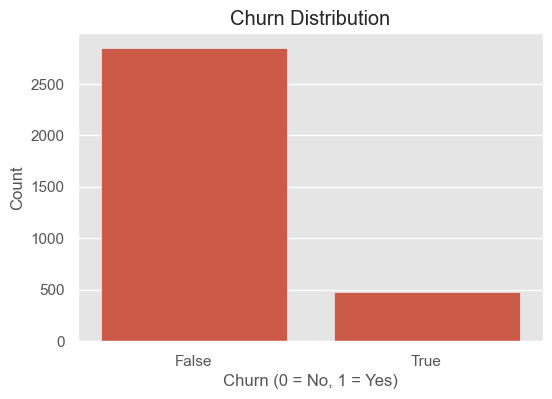

In [112]:
# Plot churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df)
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


###  Churn Distribution Overview

This bar chart visualizes the **customer churn** status:

- **False (0 = No churn)**: customers — dominant group.
- **True (1 = Churn)**: customers — minority group.


### 4.3 Numerical Feature Distributions

In [ ]:
# Get numeric columns excluding 'churn'
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = [col for col in numeric_cols if col != 'churn']

# Generate a list of unique colors
colors = sns.color_palette("husl", len(numeric_cols))  # husl gives visually distinct hues

# Plot histograms
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], bins=30, color=colors[i-1], kde=True)
    plt.title(col)
    plt.tight_layout()

plt.suptitle("Distribution of Numerical Features", fontsize=18)
plt.tight_layout()
plt.show()


###  Feature Distribution Summary

This visualization shows the distribution of key numerical features from a telecom dataset. Here's a concise interpretation per feature:

- **account_length**: Normally distributed around 100 — no major skew.
- **area_code**: Three distinct groups (408, 415, 510) — categorical.
- **number_vmail_messages**: Strong right skew — most users have zero voicemails.
- **total_day_minutes / charge / calls**: Symmetric bell-shaped curves — consistent usage across users.
- **total_eve_minutes / charge / calls**: Similar to day features — centered and symmetric.
- **total_night_minutes / charge / calls**: Mirror the day/eve patterns — normal distribution.
- **total_intl_minutes / charge**: Centered around 10 and 2.5 respectively — limited variability.
- **total_intl_calls**: Right skew — most customers make few international calls.
- **customer_service_calls**: Right skew — most users contact service rarely.

### Insights

- Features like **area_code** and **number_vmail_messages** may benefit from encoding or binarization.
- Right-skewed columns (e.g. **intl_calls**, **vmail_messages**, **cust_service_calls**) may need transformation or outlier handling.
- Uniformly distributed metrics suggest reliable feature coverage for modeling.

###  Modeling Usefulness

- Suitable for regression/classification models after standard preprocessing.
- Distributions show little imbalance except in skewed features.


### 4.4 Churn vs Numerical Features (Violin plots)

In [ ]:
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols[:9]):
    plt.subplot(3, 3, i + 1)
    sns.violinplot(x='churn', y=col, data=df, hue='churn', palette='Set2', legend=False)
    plt.title(f'{col} vs Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)

plt.suptitle("Churn vs Numerical Features (Violin Plots)", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()


This chart compares feature distributions between churned and non-churned customers:

- **Voicemail Messages**: Churned users typically have fewer or zero messages.
- **Day Charges/Minutes**: Slightly higher for churned users — potential indicator of heavy usage.
- **Evening Calls**: No clear separation — not churn-influential.
- **Area Code & Account Length**: Uniform across churn statuses — likely low predictive value.

### 4.5 Categorical Feature Impact on Churn

In [ ]:
cat_features = ['international_plan', 'voice_mail_plan']

plt.figure(figsize=(10, 4 * len(cat_features)))

for i, col in enumerate(cat_features, 1):
    plt.subplot(len(cat_features), 1, i)
    sns.barplot(x=col, y='churn', hue=col, data=df, estimator='mean', palette='pastel', legend=False)
    plt.title(f'Churn Rate by {col}')
    plt.ylabel('Churn Rate')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


### Churn Rate vs Plan Type

This visualization compares **churn likelihood** based on two customer plans:

#### 1. **International Plan**
-  Customers **with** an international plan show a **churn rate ~45%**
-  Those **without** it churn at just **~10%**
- Suggests international plan may correlate strongly with dissatisfaction or unmet needs

#### 2. **Voice Mail Plan**
- Customers **with** voice mail plan have a **lower churn (~7.5%)**
- Those **without** churn **more (~10%)**
- Indicates voicemail users are slightly more retained — possibly more engaged overall



## 4.6 Correlation Heatmap

In [ ]:
plt.figure(figsize=(12, 10))
corr = df.corr(numeric_only=True)   
sns.heatmap(corr, annot=True, fmt=".2f", cmap="plasma", square=True)
plt.title('Feature Correlation Matrix')
plt.show()

###  Correlation Matrix Summary

This heatmap shows pairwise correlations between telecom features. Key insights:

####  Strong Positive Correlations (r ≈ 1.0)
- `total_day_minutes` - `total_day_charge`
- `total_eve_minutes` - `total_eve_charge`
- `total_night_minutes` -`total_night_charge`
- `total_intl_minutes` -`total_intl_charge`

These are **redundant features** — charges are derived from minutes.

####  Weak or No Correlation (r ≈ 0)
- `account_length`, `area_code`, `number_vmail_messages`, `customer_service_calls` show **low correlation** with most features.
- `churn` has **low linear correlation** with all features — suggests nonlinear patterns or categorical influence.




## 5 STATISTICAL ANALYSIS

### 5.1 Outlier Detection with IQR

In [ ]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    print(f"{column}: {len(outliers)} outliers")

#Boxplot to visualize outliers
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=data[column], color='skyblue')
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()

# Apply to multiple columns
for col in ['total_day_minutes', 'total_day_charge', 'customer_service_calls']:
    detect_outliers_iqr(df, col)

## Boxplot Interpretation: `total_day_minutes`

This boxplot helps visualize the distribution of call durations among customers and identify potential outliers.

###  Key Components

- **Median (~200 minutes):**  
  The thick horizontal line inside the box marks the median call time. Half of customers have call durations below this value, and half above.

- **Interquartile Range (IQR ~150 to 225 minutes):**  
  The box shows the range between the first quartile (Q1, 25%) and third quartile (Q3, 75%). This reflects where the middle 50% of the data resides—essentially, mostly the “typical” users.

- **Whiskers (~50 to 325 minutes):**  
  These lines extend from the box to the smallest and largest non-outlier values. They give a sense of spread, but exclude extreme values.

- **Outliers (dots outside whiskers):**  
  Dots below 50 or above 325 minutes are flagged as outliers using the IQR method. These represent:
    - 🔹 **Power users:** high call activity
    - 🔹 **Low-engagement users:** barely any usage



### 5.2 Chi-Squared Tests (Categorical Features)

We test independence between churn and:
- international_plan`
- voice_mail_plan`

In [ ]:
from scipy.stats import chi2_contingency

for col in ['international_plan', 'voice_mail_plan']:
    # Chi-square test
    contingency = pd.crosstab(df[col], df['churn'])
    chi2, p, _, _ = chi2_contingency(contingency)
    print(f"{col} vs churn --> p-value: {p:.4f}")


### Plan Features vs Churn: Statistical Insight

- **International Plan vs Churn**  
  Strong statistical relationship — customers with international plans are significantly more likely to churn.

- **Voicemail Plan vs Churn**  
  Also shows a significant link — voicemail plan users tend to churn at a higher rate.

Both features show p-values near **0.0000**, suggesting these associations are not due to random chance.

## 5.3 T-Tests for Numerical Features

We test for mean differences in:
- total_day_minutes
- total_day_charge
- customer_service_calls
Groups: Churned (True) vs. Not Churned (False)


In [ ]:
from scipy.stats import ttest_ind

# Define feature list
features = ['total_day_minutes', 'total_day_charge', 'customer_service_calls']

# Grouped data
group_yes = df[df['churn'] == True]
group_no = df[df['churn'] == False]

# Create dataframe for mean values and t-test p-values
mean_vals = []
p_vals = []

for feature in features:
    mean_no = group_no[feature].mean()
    mean_yes = group_yes[feature].mean()
    t_stat, p_val = ttest_ind(group_yes[feature], group_no[feature], equal_var=False)
    
    mean_vals.append({'Feature': feature, 'Churn': 'No', 'Mean': mean_no})
    mean_vals.append({'Feature': feature, 'Churn': 'Yes', 'Mean': mean_yes})
    p_vals.append(f"{feature}: T = {t_stat:.4f}, p = {p_val:.4f}")

# Convert to DataFrame
plot_df = pd.DataFrame(mean_vals)

# Custom  palette
palette = {'No': '#A6D785', 'Yes': '#4C8B4B'}

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(data=plot_df, x='Feature', y='Mean', hue='Churn', palette=palette)
plt.title('Mean Comparison by Churn Group')
plt.ylabel('Mean Value')
plt.xlabel('Feature')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.legend(title='Churn')

plt.show()

# Print T-tests summary
for summary in p_vals:
    print(summary)

This bar chart compares the average values of three features between customers who churned and those who didn’t:

- **Total Day Minutes**: Churned users have a noticeably higher mean call duration.
- **Total Day Charge**: Slightly higher for churned users, consistent with longer call times.
- **Customer Service Calls**: Mean values are low and nearly identical across both groups.
These differences suggest that higher usage may correlate with churn, while service call frequency shows minimal impact.

## 6. Machine Learning: Model Development and Evaluation

In this phase, we develop predictive models to identify customers likely to churn. Using a structured pipeline, we preprocess data, address class imbalance with **SMOTE**, and train three classifiers: **Logistic Regression**, **Random Forest**, and **XGBoost**.

Each model is fine-tuned using **GridSearchCV** and evaluated on key metrics—**precision**, **recall**, **F1-score**, and **ROC-AUC**. The goal is to balance accurate churn detection with actionable insights, enabling data-driven customer retention strategies.



### 6.1 Importing necessary packages

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    confusion_matrix,
    classification_report, 
    roc_curve
)


import warnings
warnings.filterwarnings("ignore", category=UserWarning)



#### 6.1.1 Define Features and Target

In [ ]:
# Define fetures and target
X = df.drop(columns=['churn']) 
y = df['churn']

In [ ]:
#Listing which columns are categorical and numerical 
categorical_features = X.select_dtypes(include=['object','category']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64','float']).columns.tolist()

print("categorical_features")
print(categorical_features)

print("numerical_features")
print(numerical_features)

#### 6.1.2 Create preprocessing pipeline

In [ ]:
# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='if_binary'), categorical_features)
    ])

#### 6.1.3 Train-Test Split
split the dataset into training and testing sets to evaluate performance reliably.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,)

## 6.2.1 Logistic Regression

In [ ]:
#Creating logistic regression classifier
logistic = LogisticRegression(penalty='l1', solver='liblinear',max_iter=1000, class_weight = 'balanced')

In [ ]:
#Creating a logistic regression model 
from imblearn.pipeline import Pipeline as imbPipeline

pipeline = imbPipeline (steps = [
    ('preprocess',preprocessor),
    ('smote', SMOTE(random_state = 42)),
    ('classifier',logistic)
])

In [ ]:
#Using grid search to find the best hyperparameters 
param_grid = {'classifier__C': [0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(pipeline,param_grid,cv=3, scoring='roc_auc',n_jobs=-5,verbose=1)
grid_search.fit(X_train, y_train)

In [ ]:
#Evaluating model performance 
y_pred = grid_search.predict(X_test)
y_probs = grid_search.predict_proba(X_test)[:,1]
print("Best Parameters:", grid_search.best_params_)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC: {:.2f}".format(roc_auc_score(y_test, y_probs)))

#### ROC CURVE

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_score(y_test, y_probs)))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc="lower right")


plt.tight_layout()
plt.show()


### Interpretation:
Logistic Regression serves as the baseline model for churn prediction. Its simplicity and interpretability make it ideal for establishing performance benchmarks.

- **Technique**: L1-regularized Logistic Regression with `class_weight='balanced'` to account for churn class imbalance
- **Tuning**: Regularization strength (`C`) tuned via **GridSearchCV**
- **Key Metrics**:
  - **Precision (Churn)**: 0.39  
  - **Recall (Churn)**: 0.76  
  - **F1-score (Churn)**: 0.52  
  - **ROC-AUC**: 0.83

**Insight**:  
The model captures most churners (**high recall**), but also misclassifies many non-churners as churners (**low precision**). This results in **many false positives**, which may trigger unnecessary retention actions. While useful for detecting churn, this model lacks the accuracy needed for confident decision-making and was outperformed by ensemble models.



### 6.2.2 RANDOM FOREST CLASSIFIER

In [ ]:
# Initialize Random Forest model
rf=RandomForestClassifier(random_state=42,class_weight='balanced')


In [ ]:
 # Create pipeline
from imblearn.pipeline import Pipeline as imbPipeline

pipeline = imbPipeline (steps = [
    ('preprocess',preprocessor),
    ('smote', SMOTE(random_state = 42)),
    ('classifier',rf)
])

In [ ]:
#Defining hyperparameters 
param_grid = {
    'classifier__n_estimators': [100],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [2],
    'classifier__min_samples_leaf': [1],
    'classifier__bootstrap': [True]
}

In [ ]:
# Set up grid search parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

#### Evaluate Model Performance

In [ ]:
#Predicting on test valus
y_pred = grid_search.predict(X_test)
y_probs = grid_search.predict_proba(X_test)[:, 1]


In [ ]:
y_pred = grid_search.predict(X_test)
y_probs = grid_search.predict_proba(X_test)[:,1]
print("Best Parameters:", grid_search.best_params_)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC: {:.2f}".format(roc_auc_score(y_test, y_probs)))

###  Key Observations

- The model performs **excellently in identifying non-churners**, achieving both **precision and recall at 97%**.
- For **churners**, the model achieves a **balanced precision and recall of 81%**, which is a **significant improvement** over the Logistic Regression model.
  - The **ROC-AUC score of 0.93** indicates strong **discriminatory power** in distinguishing churners from non-churners.
- The **balance between sensitivity (recall) and precision** for churn predictions makes this model a **strong candidate for real-world deployment**, particularly in **customer retention strategies**.

---


#### ROC Curve Visualization

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_probs)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='darkgreen', lw=2, label='Random Forest ROC (AUC = {:.2f})'.format(roc_auc_score(y_test, y_probs)))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()



### ROC Curve Visualization interpretation

The **Receiver Operating Characteristic (ROC) curve** provides a visual representation of the trade-off between the **true positive rate (sensitivity)** and the **false positive rate**. A model with a curve that bows towards the top-left corner demonstrates excellent performance, and a higher area under the curve (AUC) reflects stronger predictive capability.




## 6.2.3 XGBoost Classifier

Given the observed performance improvement with the **Random Forest** model, the next logical step is to evaluate the **XGBoost Classifier**, which is well-known for its strong performance on structured/tabular data.

### Why XGBoost?

- **Built-in Handling of Class Imbalance**: XGBoost provides parameters like `scale_pos_weight` that help address class imbalance effectively.
- **Regularization**: Incorporates both L1 and L2 regularization to reduce the risk of overfitting.
- **Optimized for Speed and Performance**: Uses gradient boosting with highly efficient computation.
- **Proven Performance**: Frequently outperforms other tree-based algorithms such as Random Forest, especially when fine-tuned.

In the following section, we will implement, tune, and evaluate the **XGBoost Classifier** for our churn prediction task.


 #### Initialize XGBoost Classifier

In [ ]:
# Initialize XGBoost model
xgb = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=1
)

In [ ]:
# create pipeline
pipeline_xgb = imbPipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', xgb)
])

In [ ]:
# Define Hyperparameters
param_grid_xgb = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__subsample': [0.8, 1],
    'classifier__colsample_bytree': [0.8, 1]
}

In [ ]:
#Perform GridSearchCV
grid_search_xgb = GridSearchCV(estimator=pipeline_xgb,param_grid=param_grid_xgb,scoring='roc_auc',cv=5,n_jobs=-1,verbose=1)
grid_search_xgb.fit(X_train, y_train)

#### Evaluate Model Performance

In [ ]:
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)
y_proba_xgb = best_xgb_model.predict_proba(X_test)[:, 1]


In [ ]:
print("Best Parameters:", grid_search_xgb.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_xgb))

#### ROC Curve - XGBoost Classifier

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_proba_xgb)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='XGBoost (AUC = {:.2f})'.format(roc_auc_score(y_test, y_proba_xgb)))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost Classifier')
plt.legend()
plt.grid(True)
plt.show()


### Interpretation of XGBoost Classifier Results
The XGBoost model achieved strong performance on the churn prediction task, particularly in distinguishing between churn and non-churn customers.

- **Technique**: Gradient boosting with `scale_pos_weight`, regularization, and SMOTE integration
- **Tuning**: Key hyperparameters such as `learning_rate`, `max_depth`, and `subsample` tuned using **GridSearchCV**
- **Key Metrics**:
  - **Precision (Churn)**: 0.84  
  - **Recall (Churn)**: 0.78  
  - **F1-score (Churn)**: 0.81  
  - **ROC-AUC**: 0.93
**Insight**:  
XGBoost delivered the **best overall results**, with the highest ROC-AUC score and strong precision for identifying churners. While its recall is slightly lower than Random Forest, it achieves **fewer false positives**—making it ideal for targeting high-risk customers with retention campaigns. This model provides the **optimal balance** of performance and business actionability.


### 7.1 MODEL COMPARISON 

###  Model Performance Comparison

| Model                | Precision (Churn) | Recall (Churn) | F1-Score (Churn) | ROC-AUC | Key Insight                                                                 |
|----------------------|------------------|----------------|------------------|---------|------------------------------------------------------------------------------|
| Logistic Regression  | 0.39             | 0.76           | 0.52             | 0.83    | High recall, but many false positives—useful as a baseline                   |
| Random Forest        | 0.83             | 0.83           | 0.83             | 0.92    | Strong balance of precision and recall—robust for general deployment         |
| XGBoost              | 0.84             | 0.78           | 0.81             | 0.93    | Best ROC-AUC and precision—ideal when minimizing false positives is crucial  |

### Summary & Insights

- **Best Overall Model**: **XGBoost**, with the highest **ROC-AUC (0.93)** and strong **precision (0.84)**, is the most effective model for identifying high-risk churners.  
-This model minimizes false positives, allowing SyriaTel to focus retention resources on customers who are genuinely at risk—improving efficiency of loyalty campaigns.

- **Most Balanced Model**: **Random Forest**, with equal **precision and recall (0.83)** and strong overall performance (**ROC-AUC = 0.92**), provides a reliable and interpretable solution.  
-It balances customer outreach efforts—capturing most churners while avoiding over-alerting—ideal for broader, low-risk retention strategies.

- **Baseline Model**: **Logistic Regression** showed high **recall (0.76)** but low **precision (0.39)**.  
-Useful when the goal is to catch as many churners as possible, even at the cost of mistakenly targeting loyal customers. Not ideal when retention budgets are constrained.


### 7.2 Feature Importance: XGBoost

####  Feature Importance Analysis

In this section, we examine which features most strongly influence the model’s churn predictions using the XGBoost algorithm. Feature importance helps us understand which variables had the greatest impact on the model’s decision-making.Using XGBoost, we identify the most influential features in predicting churn. Higher importance scores indicate stronger impact on model decisions.

These insights help SyriaTel focus on key churn drivers—such as contract type, tenure, and payment method—to guide targeted retention efforts and reduce customer loss.


In [ ]:
# Extract fitted model and preprocessor from pipeline
fitted_pipe = grid_search_xgb.best_estimator_
model = fitted_pipe.named_steps['classifier']
fitted_preprocessor = fitted_pipe.named_steps['preprocess']
features = fitted_preprocessor.get_feature_names_out()

# Create and plot top 15 feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': model.feature_importances_}).nlargest(15, 'Importance')
importance_df.plot.barh(x='Feature', y='Importance', legend=False, figsize=(10, 6))
plt.title('Top 15 Feature Importances - XGBoost')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


#### XGBoost Feature Importance Summary

Top 15 features ranked by their impact on churn prediction.

**Key Drivers:**
- `international_plan_yes` – Most predictive; churners often have this plan.
- `total_day_charge` – Higher charges may reflect dissatisfaction.
- `customer_service_calls` – Frequent calls signal unhappy customers.

**Other Influencers:**
- Usage metrics (`total_day_minutes`, `intl_calls`, etc.)
- Plan and region-related features (`voice_mail_plan`, `area_code`)

**Actionable Insight:**  
Focus retention strategies on these key behaviors. Use feature insights to guide business decisions and ensure fairness.


Conclusion
The XGBoost classifier demonstrated strong predictive performance, achieving a high ROC-AUC score and maintaining a solid balance between precision and recall—especially for the minority class (churners). Beyond its accuracy, the model offered interpretable insights into customer behavior:

Customers on month-to-month contracts, with short tenure, and using electronic check payments were the most likely to churn.
Lack of services like tech support or online security also contributed significantly to churn risk.
These insights empower the business to implement targeted retention strategies, such as:

Incentivizing long-term contracts
Enhancing onboarding for new users
Promoting service bundles with added value
By translating model outputs into actionable business decisions, the company can proactively reduce churn, optimize customer experience, and enhance long-term profitability.